# Regressão Logística usando Softmax no Keras - Iris dataset

Este notebook procura reproduzir o exemplo de Regressão Logística usando Softmax,
já feito utilizando programação matricial. 
Neste notebook utiliza-se o Keras, utilizando o mesmo modelo e mesmos parâmetros

In [1]:
import numpy as np

import keras
import matplotlib.pyplot as plt
%matplotlib inline


Using Theano backend.


## Getting the data
Keras also offers a collection of datasets that can be used to train and test the model. The MNIST set is a part of the available datasets and can be loaded as shown below.

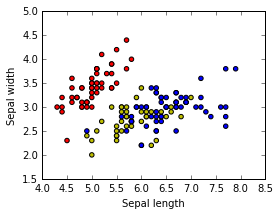

In [2]:
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features: length and width of the sepals
Y = iris.target

plt.figure(1, figsize=(4, 3))
colors = np.array(['r','y','b'])
plt.scatter(X[:, 0], X[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Convert class vectors to binary class matrices

In [3]:
from keras.utils import np_utils 
Y_oh = np_utils.to_categorical(Y, 3) 
print Y[0:5]
print Y_oh[0:5]

[0 0 0 0 0]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


# Build the model

In [24]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD
output_dim = nb_classes = 3 
model = Sequential() 
model.add(Dense(output_dim, input_dim=2, activation='softmax')) 
batch_size = 150
nb_epoch = 10000

# Compile the model

Excelente blog sobre otimização:

http://sebastianruder.com/optimizing-gradient-descent/


In [33]:
sgd = SGD(lr=150 * 1e-3, decay=0e-6, momentum=0., nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X, Y_oh, batch_size=batch_size, nb_epoch=nb_epoch,verbose=0)
loss = model.evaluate(X, Y_oh, verbose=0)
#print history.history
print 'loss:',loss


loss: 0.402787098487


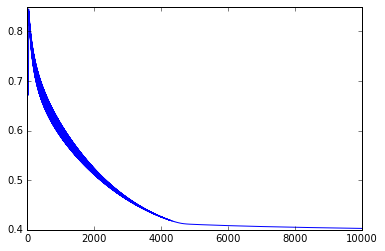

In [34]:
plt.plot(history.history['loss'])

In [35]:
W = model.get_weights()
print W

[array([[-4.65348339,  1.71750474,  3.35777831],
       [ 7.46369362, -3.64114547, -3.28298783]], dtype=float32), array([ 3.95797253,  3.64684153, -7.60483074], dtype=float32)]


In [39]:
def getAccuracy(X,Y):
    Y_hat = model.predict_classes(X)
    print 'Y_hat:', Y_hat[:5]
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

train_ac = getAccuracy(X,Y)
print 
print 'Training Accuracy: ', train_ac


 32/150 [=====>........................] - ETA: 0sY_hat: [0 0 0 0 0]

Training Accuracy:  0.826666666667


39456/39501 [============================>.] - ETA: 0s

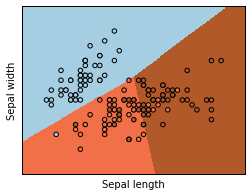

In [40]:
h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()